In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
d = pd.read_excel('dane.xlsx')

In [3]:
d.head()

,id,pamięć,lista
0,1,9,z
1,2,11,n
2,3,16,z
3,4,8,n
4,5,7,n


In [8]:
# A mówiłem, żeby unikać polskich znaków w nazwach zmiennych!

d = d.rename(columns={'pamięć': 'pamiec'})

# Analiza statystyczna

To jest do wklejenia na koniec rozdziału metody, uzupełnijcie tylko nazwy zmiennych zależnych ZZ i niezależnych ZN.
    
> W celu zbadania wpływu ZN na ZZ wykonano jednoczynnikową analizę wariancji. Wszystkie obliczenia wykonano w języku Python przy użyciu bibliotek _Pandas, Numpy i Statsmodels_. Wykres przygotowano przy użyciu biblioteki _Seaborn_.

# Średnie i odchylenia

In [10]:
gr = d.groupby(['lista'])

#### Średnie w grupach:

In [11]:
round(gr.pamiec.mean(), 2)

lista
n     7.9
z    10.1
Name: pamiec, dtype: float64

#### Odchylenia standardowe:

In [12]:
round(gr.pamiec.std(), 2)

lista
n    1.62
z    3.14
Name: pamiec, dtype: float64

# Boxplot

Poniżej wykres gotowy do wklejenia do artykułu. Plik png w wysokiej rozdzielczości w załączniku.

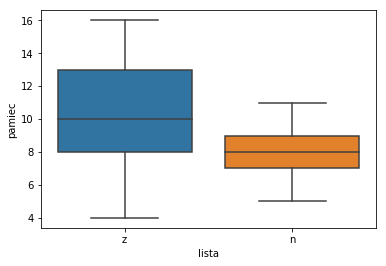

In [13]:
sns.boxplot(x=d.lista, y=d.pamiec)
plt.savefig('boxplot.png', dpi=150)

# Test t

Test t Studenta odpowiada nam na pytanie, czy istnieją istotne statystycznie różnice pomiędzy średnimi. W tym przypadku udało się wykryć różnice pomiędzy średnimi. Opisując wyniki należy po podaniu wartości śrendnich i odchyleń standardowych napisać coś takiego (oczywiście uzupełnijcie ZZ i ZN).

> Różnice w ZZ pod względem ZN okazały się istotne statystycznie; t = 2,782 ; p < 0,01.

In [14]:
from scipy import stats

In [15]:
res = stats.ttest_ind(d.loc[d['lista'] == 'z', 'pamiec'],
               d.loc[d['lista'] == 'n', 'pamiec'])

In [16]:
print('t =', round(res[0], 3), '; p = ', round(res[1], 3))

t = 2.782 ; p =  0.008
